# C2M2: Peer Reviewed Assignment

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Outline:
The objectives for this assignment:

1. Utilize contrasts to see how different pairwise comparison tests can be conducted.
2. Understand power and why it's important to statistical conclusions.
3. Understand the different kinds of post-hoc tests and when they should be used.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

# Problem 1: Contrasts and Coupons

Consider a hardness testing machine that presses a rod with a pointed tip into a metal specimen with a known force. By measuring the depth of the depression caused by the tip, the hardness of the specimen is determined.

Suppose we wish to determine whether or not four different tips produce different readings on a hardness testing machine. The experimenter has decided to obtain four observations on Rockwell C-scale hardness for each tip. There is only one factor - tip type - and a completely randomized single-factor design would consist of randomly assigning each one of the  4×4=16  runs to an experimental unit, that is, a metal coupon, and observing the hardness reading that results. Thus, 16 different metal test coupons would be required in this experiment, one for each run in the design.

In [3]:
tip    <- factor(rep(1:4, each = 4))
coupon <- factor(rep(1:4, times = 4))
y <- c(9.3, 9.4, 9.6, 10,
       9.4, 9.3, 9.8, 9.9,
       9.2, 9.4, 9.5, 9.7,
       9.7, 9.6, 10, 10.2)
hardness <- data.frame(y, tip, coupon)
hardness

y,tip,coupon
<dbl>,<fct>,<fct>
9.3,1,1
9.4,1,2
9.6,1,3
10.0,1,4
9.4,2,1
9.3,2,2
9.8,2,3
9.9,2,4
9.2,3,1


### 1. (a) Visualize the Groups

Before we start throwing math at anything, let's visualize our data to get an idea of what to expect from the eventual results.

Construct interaction plots for `tip` and `coupon` using ggplot(). Be sure to explain what you can from the plots.

`geom_smooth()` using formula 'y ~ x'



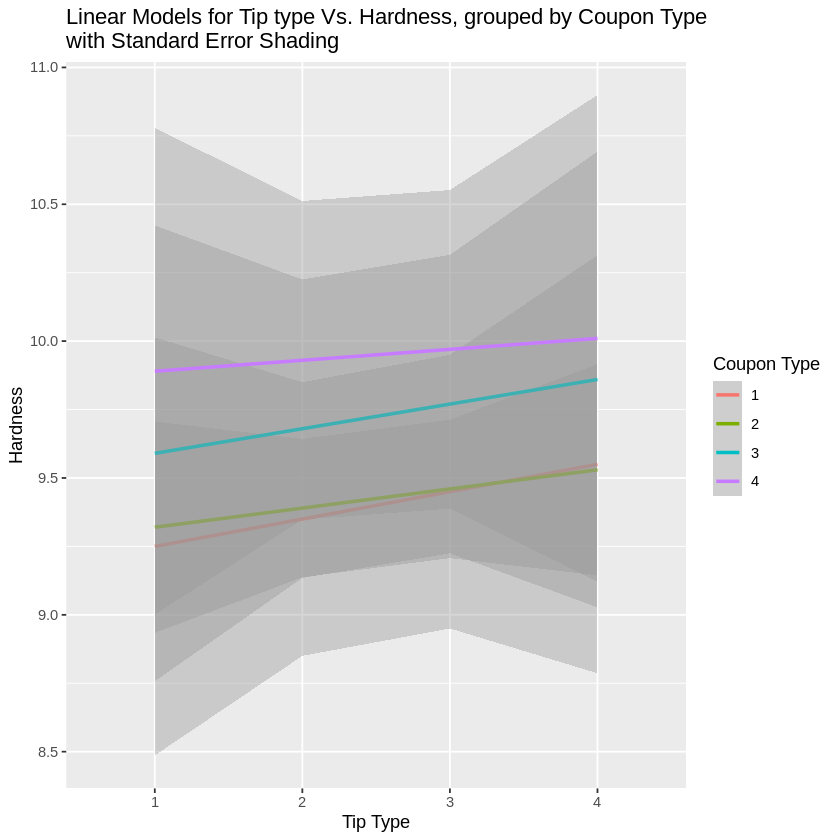

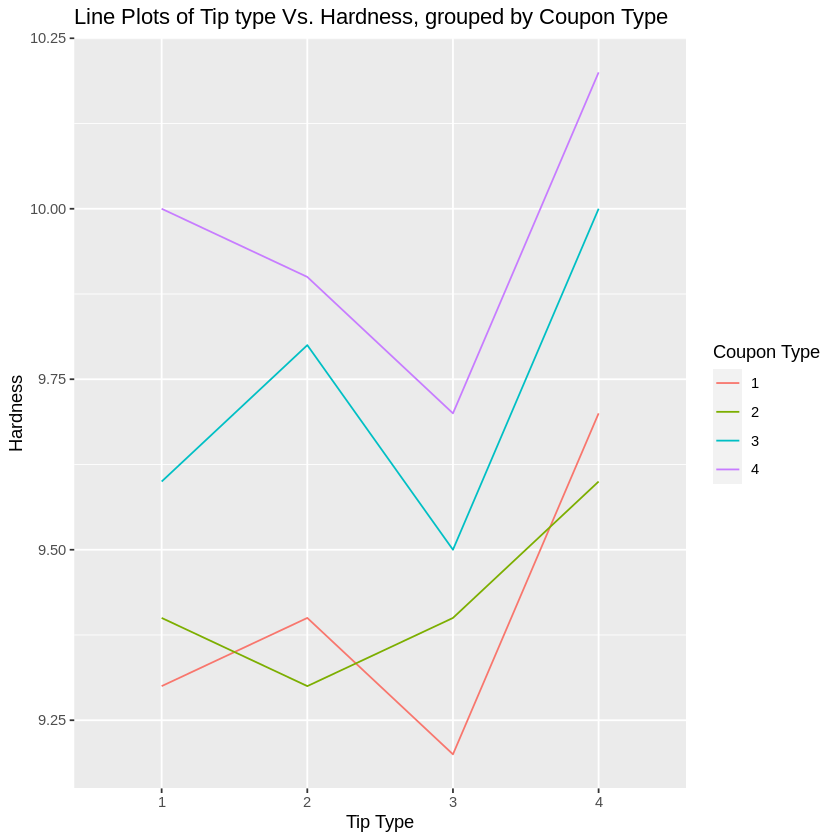

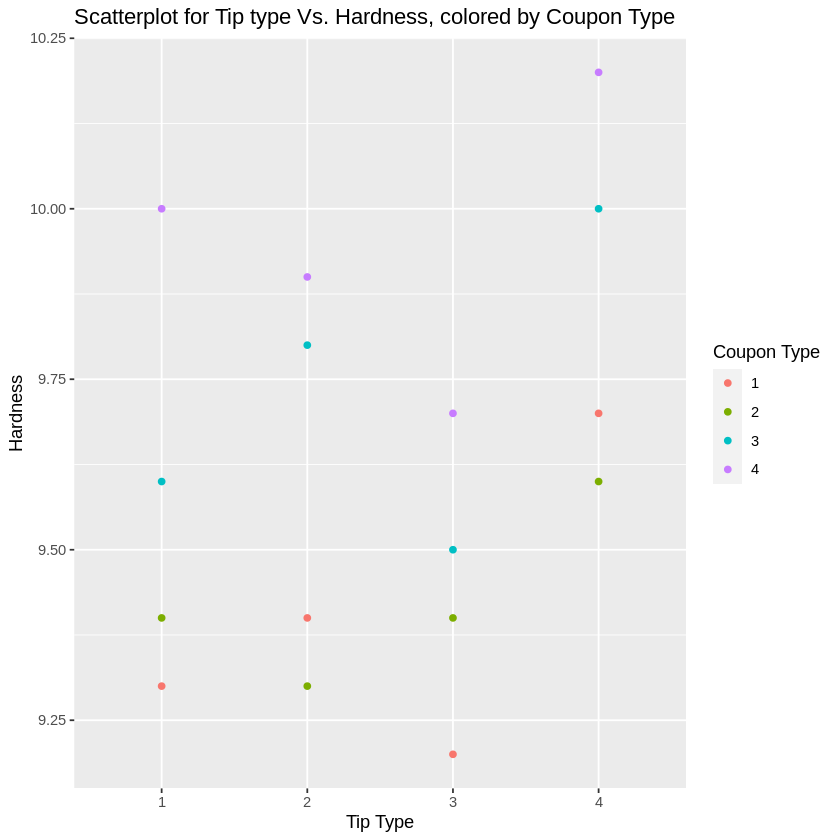

In [5]:
# Your Code Here
hardness %>%
    ggplot(aes(y = y, x = tip)) +
    geom_smooth(method = "lm", se = TRUE, aes(group = coupon, color = coupon)) +
    labs(x = "Tip Type",
         color = "Coupon Type",
         y = "Hardness",
         title = "Linear Models for Tip type Vs. Hardness, grouped by Coupon Type\nwith Standard Error Shading")

hardness %>%
    ggplot(aes(y = y, x = tip)) +
    geom_line(aes(group = coupon, color = coupon)) +
    labs(x = "Tip Type",
         color = "Coupon Type",
         y = "Hardness",
         title = "Line Plots of Tip type Vs. Hardness, grouped by Coupon Type")

hardness %>%
    ggplot(aes(y = y, x = tip)) +
    geom_point(aes(color = coupon)) +
    labs(x = "Tip Type",
         color = "Coupon Type",
         y = "Hardness",
         title = "Scatterplot for Tip type Vs. Hardness, colored by Coupon Type")

# My Comments:

I have included ANOVA models of the form (y ~ tip + tip:hardness) both with and without standard error shading. The plot with standard error shading shows that all slopes could be simultaneously adjusted within their respective $95\%$ confidence intervals such that all models have parallel slopes. This indicates that the interaction between tip type and coupon type is statistically insignificant. This makes sense because they are both physical variables whose selections are independent. There can therefore be no meaningful correlation between selection choices.

The scatterplot and plot without standard error shading are provided for additional context because the standard error plot somewhat obfuscates the true distribution of the data.

### 1. (b) Interactions

Should we test for interactions between `tip` and `coupon`? Maybe there is an interaction between the different metals that goes beyond our current scientific understanding!

Fit a linear model to the data with predictors `tip` and `coupon`, and an interaction between the two. Display the summary and explain why (or why not) an interaction term makes sense for this data.

In [22]:
# Your Code Here
print("Bad Model:")
summary(lm(y ~ tip + coupon + tip:coupon, data = hardness))
print("Good Model:")
summary(lm(y ~ tip + coupon, data = hardness))

[1] "Bad Model:"



Call:
lm(formula = y ~ tip + coupon + tip:coupon, data = hardness)

Residuals:
ALL 16 residuals are 0: no residual degrees of freedom!

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)   9.300e+00         NA      NA       NA
tip2          1.000e-01         NA      NA       NA
tip3         -1.000e-01         NA      NA       NA
tip4          4.000e-01         NA      NA       NA
coupon2       1.000e-01         NA      NA       NA
coupon3       3.000e-01         NA      NA       NA
coupon4       7.000e-01         NA      NA       NA
tip2:coupon2 -2.000e-01         NA      NA       NA
tip3:coupon2  1.000e-01         NA      NA       NA
tip4:coupon2 -2.000e-01         NA      NA       NA
tip2:coupon3  1.000e-01         NA      NA       NA
tip3:coupon3 -3.758e-15         NA      NA       NA
tip4:coupon3 -3.869e-15         NA      NA       NA
tip2:coupon4 -2.000e-01         NA      NA       NA
tip3:coupon4 -2.000e-01         NA      NA       NA
tip4:coupon4 -2.0

[1] "Good Model:"



Call:
lm(formula = y ~ tip + coupon, data = hardness)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10000 -0.05625 -0.01250  0.03125  0.15000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.35000    0.06236 149.934  < 2e-16 ***
tip2         0.02500    0.06667   0.375 0.716345    
tip3        -0.12500    0.06667  -1.875 0.093550 .  
tip4         0.30000    0.06667   4.500 0.001489 ** 
coupon2      0.02500    0.06667   0.375 0.716345    
coupon3      0.32500    0.06667   4.875 0.000877 ***
coupon4      0.55000    0.06667   8.250 1.73e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09428 on 9 degrees of freedom
Multiple R-squared:  0.938,	Adjusted R-squared:  0.8966 
F-statistic: 22.69 on 6 and 9 DF,  p-value: 5.933e-05


# My Comments:

The model with interaction terms (y ~ tip + coupon + tip:coupon) is meaningless, because both tip and coupon are categorical variables. As such the determination of interaction terms is akin to creating an individual group for each pair of (tip, coupon). Moreover, creating sixteen diferrent groups (one for each pair) encapsulates the sixteen data points exactly, and so the statistical estimates are meaningless - each group gets the data observation as its own estimate. This lack of meaning in interaction terms makes sense when considering that coupon selection and tip selection are independant physical variables as seen in part 1(a).

I have also fit a meaningful model (y ~ tip + coupon) which excludes interaction terms that is listed under "Good Model".

### 1. (c) Contrasts

Let's take a look at the use of contrasts. Recall that a contrast takes the form 

$$\sum_{i=1}^t c_i\mu_i = 0,$$

where $\mathbf{c} = (c_1,...,c_t)$ is a constant vector and $\mathbf{\mu} = (\mu_1,...,\mu_t)$ is a parameter vector (e.g., $\mu_1$ is the mean of the $i^{th}$ group). 

We can note that $\mathbf{c} = (1,-1,0,0)$ corresponds to the null hypothesis $H_0: \mu_2 - \mu_1 = 0$, where $\mu_1$ is the mean associated with tip1 and $\mu_2$ is the mean associated with tip2. The code below tests this hypothesis. 

Repeat this test for the hypothesis $H_0: \mu_4 - \mu_3 = 0$. Interpret the results. What are your conclusions?

In [28]:
library(multcomp)
lmod = lm(y~tip+coupon, data=hardness)
fit.gh2 = glht(lmod, linfct = mcp(tip = c(-1,1,0,0)))
summary(fit.gh2)

#estimate of mu_2 - mu_1
#with(hardness, sum(y[tip == 2])/length(y[tip == 2]) - 
#     sum(y[tip == 1])/length(y[tip == 1])) 


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)
1 == 0  0.02500    0.06667   0.375    0.716
(Adjusted p values reported -- single-step method)


In [32]:
hyp2contrast <- c(0, 0, -1, 1)
fit.hyp2 <- glht(lmod, linfct = mcp(tip = hyp2contrast))
summary(fit.hyp2)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)    
1 == 0  0.42500    0.06667   6.375 0.000129 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


# My Comments:

For the first hypothesis test we are using:

$$ H_0: \mu_1 = \mu_2 \quad \quad H_1: \mu_1 \neq \mu_2$$

We obtain a p-value of 0.716 where $p = \text{Pr}(>|t|)$. This p value calculation is correct for the alternative hypothesis. We would reject $H_0$ for a sufficiently small value of p, but a p-value of 0.716 cannot indicate rejection of the null for any reasonable selection of $\alpha$.

For the second hypothesis test we use:

$$ H_0: \mu_3 = \mu_4 \quad \quad H_1: \mu_3 \neq \mu_4$$

The p-value (calculated the same correct way) for this test was 0.000129, which for any reasonable selection of $\alpha$ will indicate the rejection of $H_0$.

In summary, we have reason to believe that $\mu_1$ is indistinguishable from $\mu_2$, while $\mu_3$ and $\mu_4$ are significantly different. It is worth noting that these means are for the different levels of tip selection, not for the different coupon types.

### 1. (d) All Pairwise Comparisons

What if we want to test all possible pairwise comparisons between treatments. This can be done by setting the treatment factor (`tip`) to "Tukey". Notice that the p-values are adjusted (because we are conducting multiple hypotheses!).

Perform all possible Tukey Pairwise tests. What are your conclusions?

In [38]:
# Your Code Here
fit <- glht(lmod, linfct = mcp(tip = "Tukey"))
summary(fit)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
2 - 1 == 0  0.02500    0.06667   0.375   0.9809    
3 - 1 == 0 -0.12500    0.06667  -1.875   0.3025    
4 - 1 == 0  0.30000    0.06667   4.500   0.0066 ** 
3 - 2 == 0 -0.15000    0.06667  -2.250   0.1817    
4 - 2 == 0  0.27500    0.06667   4.125   0.0115 *  
4 - 3 == 0  0.42500    0.06667   6.375   <0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


# My Comments:

Using $\alpha = 0.05$, from the output of the MCP summary above we can see that the statistically significant differences in tip means are:
1. $\mu_1 \neq \mu_4$
2. $\mu_2 \neq \mu_4$
3. $\mu_3 \neq \mu_4$

We can therefore conclude that tips 1 through 3 are indistinguishable from each other, but tip 4 has a mean significantly different from all others. We would need to adjust our alternative hypotheses to show direction of difference, but from the plots in 1(a) it is quite clear that tip 4 has the highest mean hardness. 

# Problem 2: Ethics in my Math Class!

In your own words, answer the following questions:

* What is power, in the statistical context?
* Why is power important?
* What are potential consequences of ignoring/not including power calculations in statistical analyses?

# My Comments

1. Power is the probability of rejecting the null hypothesis when it is false. It is the complement of the Probability of Type II error. To determine the power of a statistical test/model, we count the number of false negatives in the test data ($\beta$) and take 1 minus that number.


2. Power is important because we live in either a universe where the null hypothesis is true or it is false. Setting $\alpha$ - the probability of rejecting the null hypothesis when it is true - to a low number allows a test to capture errors that occur when $H_0$ was indeed true. However, tests/models can be intentionally designed to have a miniscule false positive rate so as to "slip-by" $\alpha$ by simply having a monsterously large $\beta$. For example if we use $H_0: \mu = 0$ vs. $H_1: \mu = 1$ with the model $\hat{\mu} = 0$ results in an $\alpha$ of exactly 0, but also a power of exactly 0. A more appropriate approach is to make effort to minimize total error, for which there are many hueristics to mix and match for :specificity, preciscion, accuracy, recall, etc.


3. By avoiding power calculation researchers can quite easily spoof significant results, in accordance with the theory of high researcher-degrees-of-freedom. A conqequence of this is that many false-positive results are in active publication and are thus believed by the scientific community. Both my parents are physicians, and they claim that half the medical knowledge that they were taught in med-school turned out to be false due to bad statistics. This can clearly have a drastic negative effect on society (we want our doctors well-informed). The modern requirements of publication pressure provide a conflict of interest against scientific robustness, and so it is important to examine research for power calcualation, or at least a justificiation of why $\beta$ is not an important hueristic (such as in a spam filter, wherein modern filters bias towards throwing away real emails).

# Problem 3: Post-Hoc Tests

There's so many different post-hoc tests! Let's try to understand them better. Answer the following questsions in the markdown cell:

* Why are there multiple post-hoc tests?
* When would we choose to use Tukey's Method over the Bonferroni correction, and vice versa?
* Do some outside research on other post-hoc tests. Explain what the method is and when it would be used.

# My Comments:

1. There are multiple post-hoc tests because there are many different ways to correct for the familywise-error problem. In addition there is no agreed upon rationale as to which is universally best, and thus different test are used based on context after making a determination regarding what is important in the research question. 


2. The Bonferroni method allows the user a few advantages and a few (potential) disadvantages over the Tukey method. The Bonferroni method is slightly conservative, yielding values of $\alpha$ that are generally a bit below the desired cutoff. This can be either good or bad depending on context and number of tests; as m increases the approximation gets worse. By overcorrecting for Type 1 Error, the Bonferroni test loses power with comparison to Tukey (only for the same number of tests). The Bonferroni method allows the user to only test a few simultaneous hypotheses, whereas the Tukey method automatically conducts all pairwise comparisons - which can be very expensive on a variable with lots of factor levels. The Tukey method is very good on factors with not that many factor levels, and allows an exact specification of $\alpha$ using the SRD distribution.


3. I read about a bunch of post-hoc tests at http://web.pdx.edu/~newsomj/uvclass/ho_posthoc.pdf. The one that I found most interesting was the Games-Howell test, which is based off of Welch's approximation to the t-test that we learned about in the introductory stats classes. This is used when within-group variances are very unequal, and / or when the sample sizes per cell are small (r <= 5). It seems that this would be much more useful that the Tukey test because in nature variances are almost never identical (outside of clever experimental design).